# <font color=blue>Assignments for "Evaluating Goodness of Fit"</font>

As in previous lessons, please submit a link to a single gist that contains links to two Juypyter notebooks (one for each assignment below).

## 1. Weather model

For this assignment, you'll revisit the historical temperature dataset. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

- Load the **weather** data from Kaggle
- Like in the previous lesson, build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why? 
- Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one? 
- Add *visibility* as additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the *visibility* in terms of the improvement in the adjusted R-squared. Which one is more useful?
- Choose the best one from the three models above with respect to their AIC and BIC scores. Validate your choice by discussing your justification with your mentor.

In [1]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
weather = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\weatherHistory.csv")

In [3]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [4]:
weather.drop(weather[weather["Precip Type"].isnull() == True].index, axis = 0, inplace = True)
weather.reset_index(drop = True, inplace = True)

In [5]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
weather.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [7]:
y = weather["Temperature (C)"] - weather["Apparent Temperature (C)"]
X = weather[["Humidity", "Wind Speed (km/h)"]]

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [10]:
linear = LinearRegression()

In [11]:
linear.fit(X_train, y_train)

LinearRegression()

In [12]:
y_testPred = linear.predict(X_test)

In [13]:
import statsmodels.api as sm

In [14]:
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                 1.560e+04
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:22:05   Log-Likelihood:            -1.3552e+05
No. Observations:               76748   AIC:                         2.710e+05
Df Residuals:                   76745   BIC:                         2.711e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4335      0.023   -103.602      0.000      -2.480      -2.387
Humidity              3.0176      0.027    112.758      0.000       2.965       3.070
Wind Speed (km/h)     0.1195      0.001    157.802      0.000       0.118       0.121
==============================================================================
Omnibus:                     3080.054   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3611.324
Skew:                           0.472   Prob(JB):                         0.00
Kurtosis:                       3.487   Cond. No.                         87.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

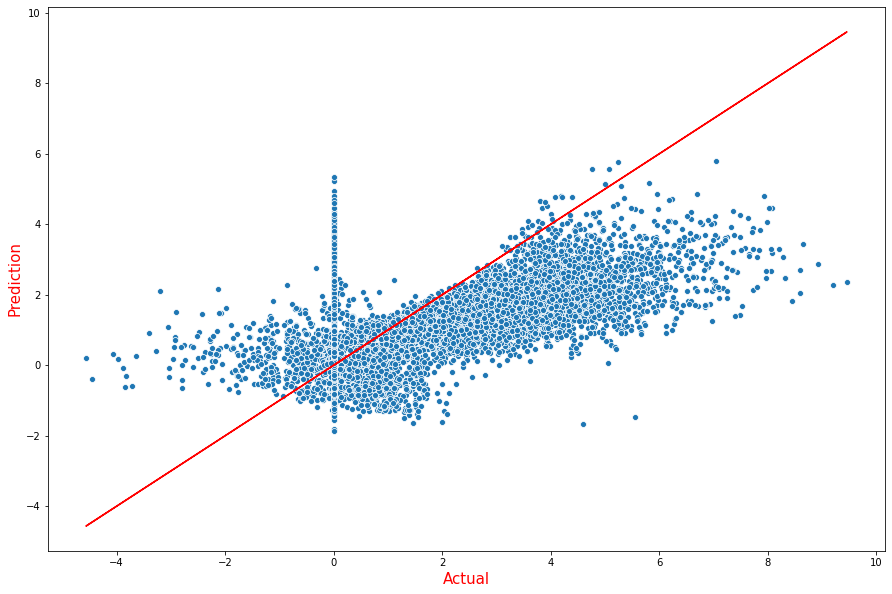

In [15]:
plt.figure(figsize = (15,10))
sns.scatterplot(y_test, y_testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", size = 15, color = "red")
plt.ylabel("Prediction", size = 15, color = "red")
plt.show()

***R-values are not satisfactory. As we can see in the graph above, prediction values are like random values instead of accurate predictions.***

In [16]:
X["Wind Speed / Humidity"] = X["Wind Speed (km/h)"] * X["Humidity"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [18]:
linear.fit(X_train, y_train)

LinearRegression()

In [19]:
y_2testPred = linear.predict(X_test)

In [20]:
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.329e+04
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:22:05   Log-Likelihood:            -1.3256e+05
No. Observations:               76748   AIC:                         2.651e+05
Df Residuals:                   76744   BIC:                         2.652e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0833      0.038     -2.219      0.027      -0.157      -0.010
Humidity                 -0.1787      0.048     -3.706      0.000      -0.273      -0.084
Wind Speed (km/h)        -0.0897      0.003    -32.451      0.000      -0.095      -0.084
Wind Speed / Humidity     0.2958      0.004     78.426      0.000       0.288       0.303
==============================================================================
Omnibus:                     3848.640   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7520.421
Skew:                           0.371   Prob(JB):                         0.00
Kurtosis:                       4.342   Cond. No.                         194.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

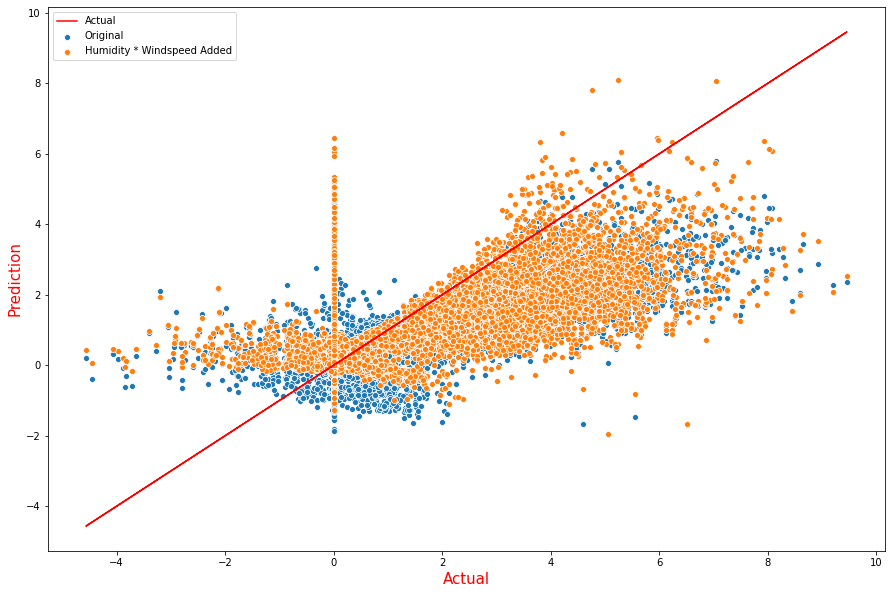

In [21]:
plt.figure(figsize = (15,10))
sns.scatterplot(y_test, y_testPred)
sns.scatterplot(y_test, y_2testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", size = 15, color = "red")
plt.ylabel("Prediction", size = 15, color = "red")
plt.legend(["Actual","Original", "Humidity * Windspeed Added"])
plt.show()

In [22]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [23]:
X = pd.concat([X, weather["Visibility (km)"]], axis = 1)

In [24]:
X.head()

,Humidity,Wind Speed (km/h),Wind Speed / Humidity,Visibility (km)
0,0.89,14.1197,12.566533,15.8263
1,0.86,14.2646,12.267556,15.8263
2,0.89,3.9284,3.496276,14.9569
3,0.83,14.1036,11.705988,15.8263
4,0.83,11.0446,9.167018,15.8263


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [26]:
linear.fit(X_train, y_train)

LinearRegression()

In [27]:
y_3testPred = linear.predict(X_test)

In [28]:
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                 1.097e+04
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:22:06   Log-Likelihood:            -1.3126e+05
No. Observations:               76748   AIC:                         2.625e+05
Df Residuals:                   76743   BIC:                         2.626e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.1006      0.043     25.305      0.000       1.015       1.186
Humidity                 -0.8923      0.049    -18.067      0.000      -0.989      -0.795
Wind Speed (km/h)        -0.1026      0.003    -37.581      0.000      -0.108      -0.097
Wind Speed / Humidity     0.3151      0.004     84.536      0.000       0.308       0.322
Visibility (km)          -0.0644      0.001    -51.435      0.000      -0.067      -0.062
==============================================================================
Omnibus:                     4218.999   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9319.686
Skew:                           0.365   Prob(JB):                         0.00
Kurtosis:                       4.543   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

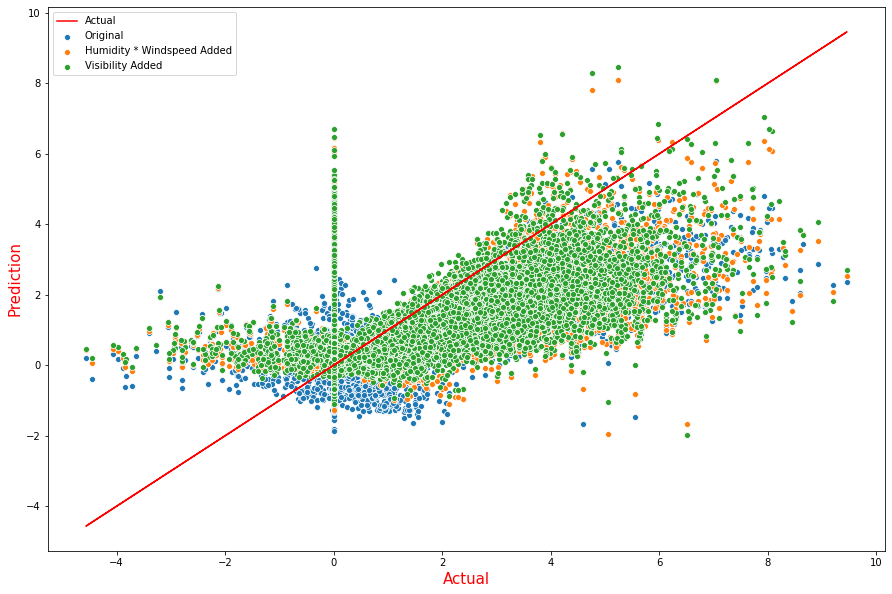

In [29]:
plt.figure(figsize = (15,10))
sns.scatterplot(y_test, y_testPred)
sns.scatterplot(y_test, y_2testPred)
sns.scatterplot(y_test, y_3testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", size = 15, color = "red")
plt.ylabel("Prediction", size = 15, color = "red")
plt.legend(["Actual","Original", "Humidity * Windspeed Added", "Visibility Added"])
plt.show()

***Apparently, third model is more succesfull than other two models. Visibility effect is not that much but it'is something.***

##  2. House prices model

In this exercise, you'll work on your house prices model. To complete this assignment, submit a link in the gist file to the Jupyter notebook containing your solutions to the following tasks:

- Load the **houseprices** data from Kaggle.
- Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
- Do you think your model is satisfactory? If so, why?
- In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables. 
- For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

In [30]:
house = pd.read_csv(r"C:\Users\Kleerys\Desktop\Career\1.1-Python\1.1-DataSets\houseprice.csv")

In [31]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
a = pd.DataFrame()
for col in house.columns:
    if (house[col].isnull().sum() >= 100):
        a = pd.concat([a, house[col]], axis = 1, names = [col])
display(a)
print(a.info())

,LotFrontage,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,65.0,NaN,NaN,NaN,NaN,NaN
1,80.0,NaN,TA,NaN,NaN,NaN
2,68.0,NaN,TA,NaN,NaN,NaN
3,60.0,NaN,Gd,NaN,NaN,NaN
4,84.0,NaN,TA,NaN,NaN,NaN
...,...,...,...,...,...,...
1455,62.0,NaN,TA,NaN,NaN,NaN
1456,85.0,NaN,TA,NaN,MnPrv,NaN
1457,66.0,NaN,Gd,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   Alley        91 non-null     object 
 2   FireplaceQu  770 non-null    object 
 3   PoolQC       7 non-null      object 
 4   Fence        281 non-null    object 
 5   MiscFeature  54 non-null     object 
dtypes: float64(1), object(5)
memory usage: 79.8+ KB
None


In [33]:
for col in a.columns:
    print(a[col].unique())

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
[nan 'Grvl' 'Pave']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [34]:
for col in house.columns:
    if col not in a.columns:
        house.drop(house[house[col].isnull()].index, inplace = True)
        house.reset_index(drop = True, inplace = True)
        a.drop(house[house[col].isnull()].index, inplace = True)
        a.reset_index(drop = True, inplace = True)

In [35]:
for col in house.columns:
    if house[col].isnull().sum() != 0:
        print("*****")
        print("{} feature has {} null values.".format(col, house[col].isnull().sum()))
print("*-*-*-*-*-*")
print("The features that has no null-values are not displayed.")

*****
LotFrontage feature has 244 null values.
*****
Alley feature has 1257 null values.
*****
FireplaceQu feature has 591 null values.
*****
PoolQC feature has 1331 null values.
*****
Fence feature has 1077 null values.
*****
MiscFeature feature has 1289 null values.
*-*-*-*-*-*
The features that has no null-values are not displayed.


In [36]:
print("Filling Lot Frontage By Feature's Mean")
mean = np.mean(house.LotFrontage.dropna())
for index in house.index:
    if np.isnan(house.LotFrontage.iloc[index]):
        house.LotFrontage.iloc[index] = mean
print("Done! Check!")
print("{} column has {} null values.".format("LotFrontage", house.LotFrontage.isnull().sum()))

Filling Lot Frontage By Feature's Mean
Done! Check!
LotFrontage column has 0 null values.


In [37]:
import scipy.stats as scis

In [38]:
def drop (target):
    z = scis.zscore(house["SalePrice"])
    limit = 4 * np.std(house["SalePrice"]) + np.mean(house["SalePrice"])
    house.drop(house[house["SalePrice"] >= limit].index, axis = 0, inplace = True)
    house.reset_index(drop = True, inplace = True)
    return house

In [39]:
z = scis.zscore(house["SalePrice"])
while (len(np.where(z > 4)[0]) != 0):
    z = scis.zscore(house["SalePrice"])
    house = drop(house["SalePrice"])
    print("*****")
    print("Threshold value: {}".format(4))
    print("Numbers of outliers: {}".format(len(np.where(z > 4)[0])))

*****
Threshold value: 4
Numbers of outliers: 8
*****
Threshold value: 4
Numbers of outliers: 3
*****
Threshold value: 4
Numbers of outliers: 1
*****
Threshold value: 4
Numbers of outliers: 0


In [40]:
y = house["SalePrice"]
X = house.drop("SalePrice", axis = 1)

In [41]:
for col in X.columns:
    try:
        np.mean(X[col])
    except:
        X.drop(col, axis = 1, inplace = True)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [44]:
linear = LinearRegression()

In [45]:
linear.fit(X_train, y_train)

LinearRegression()

In [46]:
import statsmodels.api as sm

In [47]:
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     122.6
Date:                Fri, 09 Oct 2020   Prob (F-statistic):               0.00
Time:                        15:22:07   Log-Likelihood:                -12448.
No. Observations:                1060   AIC:                         2.497e+04
Df Residuals:                    1024   BIC:                         2.515e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.455e+05   1.49e+06     -0.098      0.922   -3.06e+06    2.77e+06
Id               -3.7868      2.296     -1.649      0.099      -8.292       0.718
MSSubClass     -173.1588     29.295     -5.911      0.000    -230.643    -115.675
LotFrontage    -128.3314     52.622     -2.439      0.015    -231.590     -25.073
LotArea           0.2609      0.127      2.055      0.040       0.012       0.510
OverallQual    1.816e+04   1258.770     14.425      0.000    1.57e+04    2.06e+04
OverallCond    5138.5410   1159.601      4.431      0.000    2863.074    7414.007
YearBuilt       457.1694     82.621      5.533      0.000     295.044     619.295
YearRemodAdd    245.7391     76.797      3.200      0.001      95.041     396.437
MasVnrArea       20.9063      6.528      3.202      0.001       8.096      33.717
BsmtFinSF1        6.1357      2.703      2.270      0.023       0.832      11.440
BsmtFinSF2       -0.7058      4.582     -0.154      0.878      -9.696       8.285
BsmtUnfSF        -1.7180      2.768     -0.621      0.535      -7.150       3.714
TotalBsmtSF       3.7118      4.698      0.790      0.430      -5.507      12.931
1stFlrSF         13.9502      7.818      1.784      0.075      -1.391      29.291
2ndFlrSF         15.5664      6.733      2.312      0.021       2.355      28.778
LowQualFinSF     -9.0862     18.465     -0.492      0.623     -45.319      27.147
GrLivArea        20.4304      7.007      2.916      0.004       6.681      34.179
BsmtFullBath    1.04e+04   2792.144      3.725      0.000    4922.938    1.59e+04
BsmtHalfBath   -849.9688   4315.681     -0.197      0.844   -9318.557    7618.620
FullBath         70.3054   3073.771      0.023      0.982   -5961.305    6101.916
HalfBath      -4576.9825   2873.270     -1.593      0.111   -1.02e+04    1061.186
BedroomAbvGr  -4695.2206   1874.651     -2.505      0.012   -8373.817   -1016.624
KitchenAbvGr  -1.841e+04   6755.820     -2.725      0.007   -3.17e+04   -5153.034
TotRmsAbvGrd   4598.3850   1352.801      3.399      0.001    1943.806    7252.964
Fireplaces     6939.1793   1898.156      3.656      0.000    3214.460    1.07e+04
GarageYrBlt    -201.4130     83.857     -2.402      0.016    -365.963     -36.863
GarageCars     1.649e+04   3069.934      5.373      0.000    1.05e+04    2.25e+04
GarageArea       15.5613     10.608      1.467      0.143      -5.255      36.377
WoodDeckSF       28.6244      8.322      3.440      0.001      12.294      44.955
OpenPorchSF      17.5321     15.993      1.096      0.273     -13.851      48.916
EnclosedPorch    23.7673     17.978      1.322      0.186     -11.511      59.046
3SsnPorch        56.3509     33.548      1.680      0.093      -9.480     122.182
ScreenPorch      42.1153     17.422      2.417      0.016       7.928      76.302
PoolArea        -78.6857     22.939     -3.430   

***The model success is good enough. Yes it could be better but without any adjustment our model success is satisfactory.***

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly = PolynomialFeatures(2)

In [50]:
from sklearn.decomposition import PCA

In [58]:
X_poly = poly.fit_transform(X)

In [52]:
X_polytrain, X_polytest, y_polytrain, y_polytest = train_test_split(X_poly, y, test_size = 0.2, random_state = 52)

In [53]:
linear.fit(X_polytrain, y_polytrain)

LinearRegression()

In [54]:
y_polytestPred = linear.predict(X_polytest)

In [55]:
X_train = sm.add_constant(X_polytrain)
result = sm.OLS(y_train, X_polytrain).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     24.79
Date:                Fri, 09 Oct 2020   Prob (F-statistic):          4.33e-204
Time:                        15:22:08   Log-Likelihood:                -11493.
No. Observations:                1060   AIC:                         2.416e+04
Df Residuals:                     475   BIC:                         2.706e+04
Df Model:                         584                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        849.7906   2498.156      0.340      0.734   -4059.012    5758.594
x1         -6523.0451   4684.597     -1.392      0.164   -1.57e+04    2682.051
x2          3.138e+04   4.86e+04      0.645      0.519   -6.41e+04    1.27e+05
x3          1.572e+05   1.07e+05      1.464      0.144   -5.37e+04    3.68e+05
x4          -867.0890    477.622     -1.815      0.070   -1805.603      71.425
x5         -1.639e+06   1.94e+06     -0.845      0.398   -5.45e+06    2.17e+06
x6         -5.169e+05   2.24e+06     -0.231      0.817   -4.91e+06    3.88e+06
x7         -1.089e+04   1.61e+05     -0.068      0.946   -3.27e+05    3.06e+05
x8         -1.875e+04   1.54e+05     -0.122      0.903   -3.21e+05    2.84e+05
x9         -2820.2676   1.09e+04     -0.260      0.795   -2.42e+04    1.85e+04
x10         -471.8424   6418.974     -0.074      0.941   -1.31e+04    1.21e+04
x11         4931.4343   1.21e+04      0.407      0.684   -1.89e+04    2.88e+04
x12         2480.7941   5304.298      0.468      0.640   -7941.997    1.29e+04
x13         7004.6271   9702.160      0.722      0.471   -1.21e+04    2.61e+04
x14         -974.1574   8263.900     -0.118      0.906   -1.72e+04    1.53e+04
x15         -761.5873   5398.578     -0.141      0.888   -1.14e+04    9846.460
x16           -3.3663     24.182     -0.139      0.889     -50.883      44.151
x17        -1774.0579   6564.143     -0.270      0.787   -1.47e+04    1.11e+04
x18         1.374e+06    4.3e+06      0.319      0.750   -7.08e+06    9.82e+06
x19         3.421e+06   8.31e+06      0.412      0.681   -1.29e+07    1.97e+07
x20        -2.473e+06   4.96e+06     -0.498      0.619   -1.22e+07    7.28e+06
x21         4.619e+06    4.6e+06      1.003      0.316   -4.43e+06    1.37e+07
x22          -2.2e+06   3.12e+06     -0.705      0.481   -8.33e+06    3.93e+06
x23        -9430.6361   2.41e+04     -0.392      0.695   -5.67e+04    3.79e+04
x24         6.791e+05   2.19e+06      0.310      0.757   -3.63e+06    4.99e+06
x25         3.253e+06    2.9e+06      1.121      0.263   -2.45e+06    8.95e+06
x26        -2.008e+05   1.83e+05     -1.096      0.274   -5.61e+05    1.59e+05
x27        -9.524e+05   4.96e+06     -0.192      0.848   -1.07e+07    8.79e+06
x28          3.53e+04   1.65e+04      2.144      0.033    2943.232    6.77e+04
x29         1.326e+04   1.27e+04      1.044      0.297   -1.17e+04    3.82e+04
x30        -4.593e+04   3.01e+04     -1.526      0.128   -1.05e+05    1.32e+04
x31         1.299e+04   3.02e+04      0.430      0.667   -4.63e+04    7.23e+04
x32            0.6025      0.533      1.129      0.259      -0.446       1.651
x33        -3.386e+04   4.81e+04     -0.703      0.482   -1.28e+05    6.07e+04
x34            0.3564      0.583      0.611      0.541      -0.790       1.503
x35        -6.153e+04   1.34e+05     -0.461      0.645   -3.24e+05    2.01e+05
x3

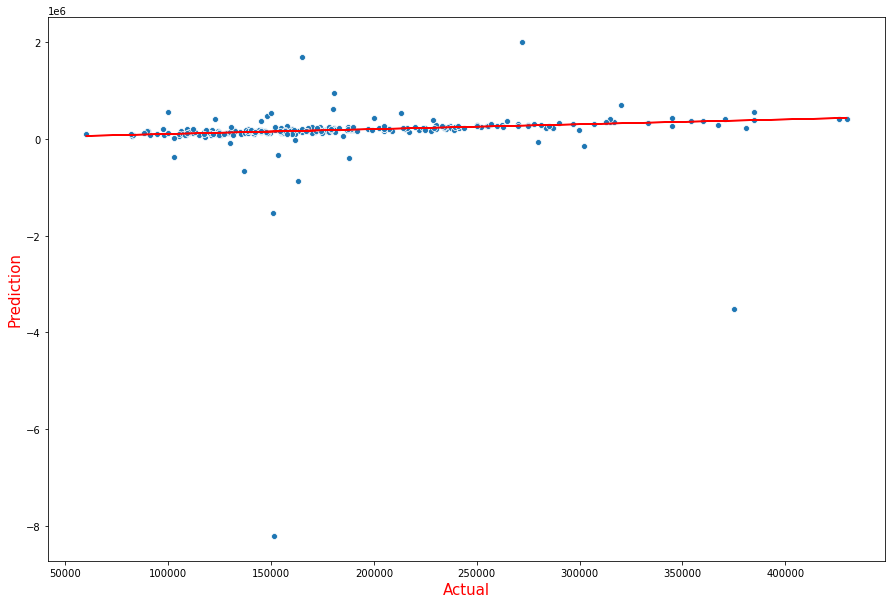

In [63]:
plt.figure(figsize = (15,10))
sns.scatterplot(y_test, y_polytestPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", size = 15, color = "red")
plt.ylabel("Prediction", size = 15, color = "red")
plt.show()